## Correlation is normalization of covariance, which means making covariance to be [-1,1]

## But what is Covariance ? It is a degree of how two random variables change together. If the Cov(X,Y) > 0 , that means when X increases, Y increases as well and vice versa

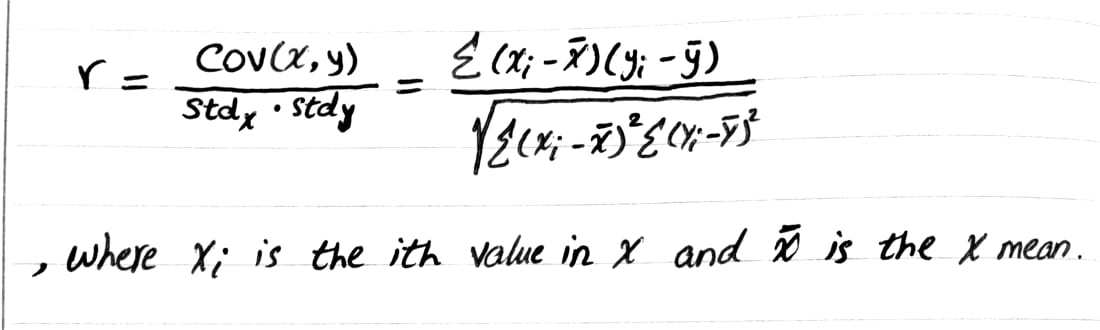

## Let's try this on some real data

First, Import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

Second, Read data from csv file

In [14]:
df = pd.read_csv("data/Salary_Data.csv")
df.head() # return the first 5 data points (rows)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


As we see, we have two columns : Years Of Exprience and Salary

Third, See data describtion

In [15]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [16]:
df.shape

(30, 2)

### Using this data we want to make a model that takes The years of experience and predicts the salary.. But We want to know what is the relation between years of experience and salary values. For that reason, we are going to use correlation to calculate how much are years of experience related to the salary value.

Fourth, Identify the input and the output 

In [17]:
X = df["YearsExperience"]
y = df["Salary"]

Fifth, Calculate the correlation between X and y

In [18]:
correlation = np.corrcoef(X, y)
correlation

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

As we see, the correlation is 0.978 which is very high that means that X and y are positively correlated 

Sixth, See the data visualized 

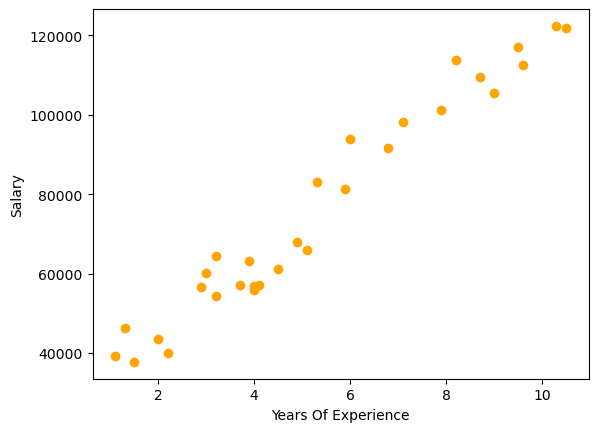

In [19]:
plt.scatter(X, y, color="orange")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.show()

It is very clear in the scatter plot that X and y are positively correlated

### But notice that the calculations we did and the scatter plot too are all about the sample we have that all contains 30 data point or 30 person. Is the 30 person sample represent the all employees in one field or even a company ? Absloutely no. So, what makes us so confident that this correlation is not only for the 30 size sample and that it is reliable too for the whole population as well 

#### The answer is Hypothesis Testing (below there is a paper with an example that I explain the idea in it)

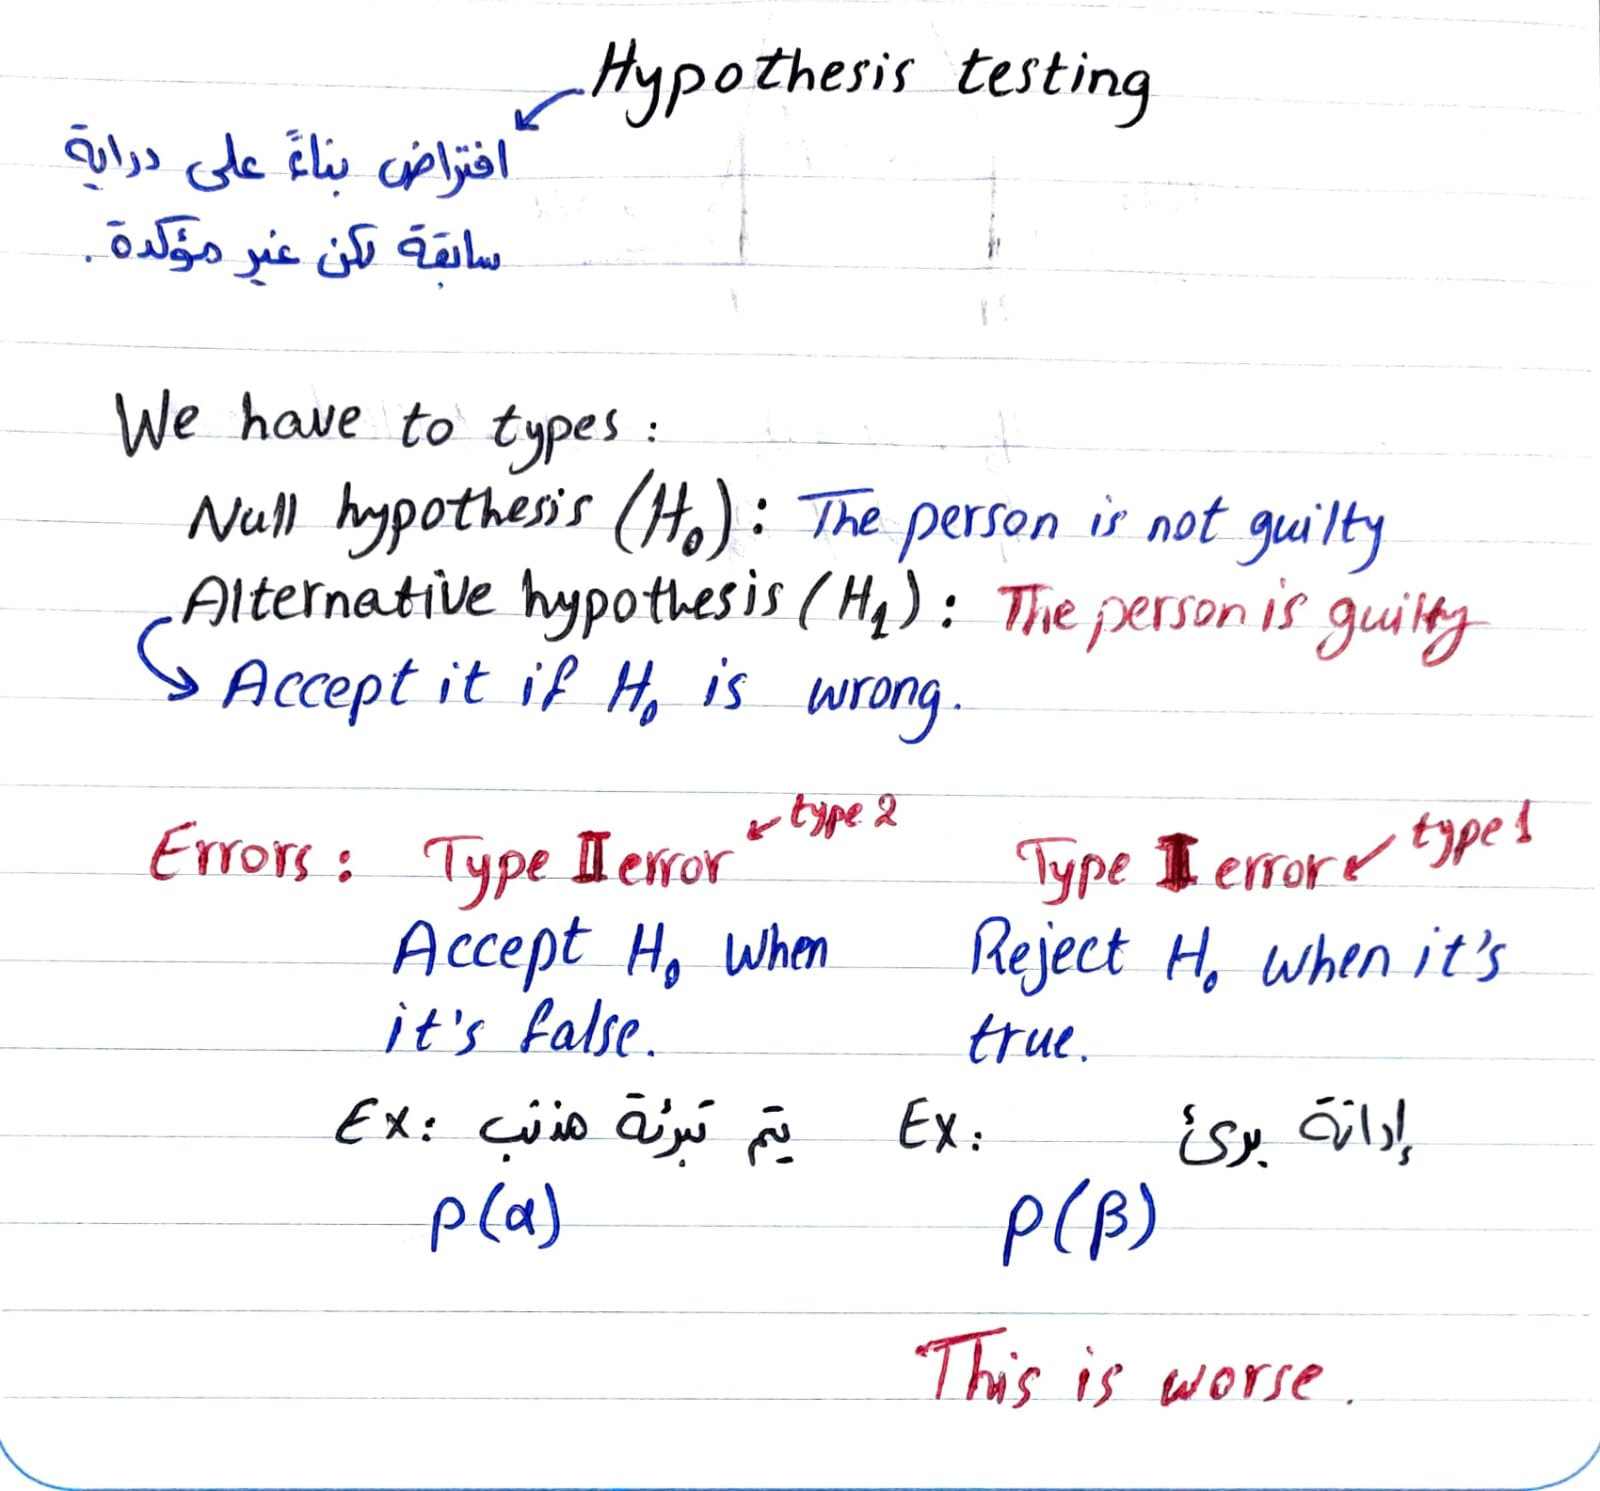 

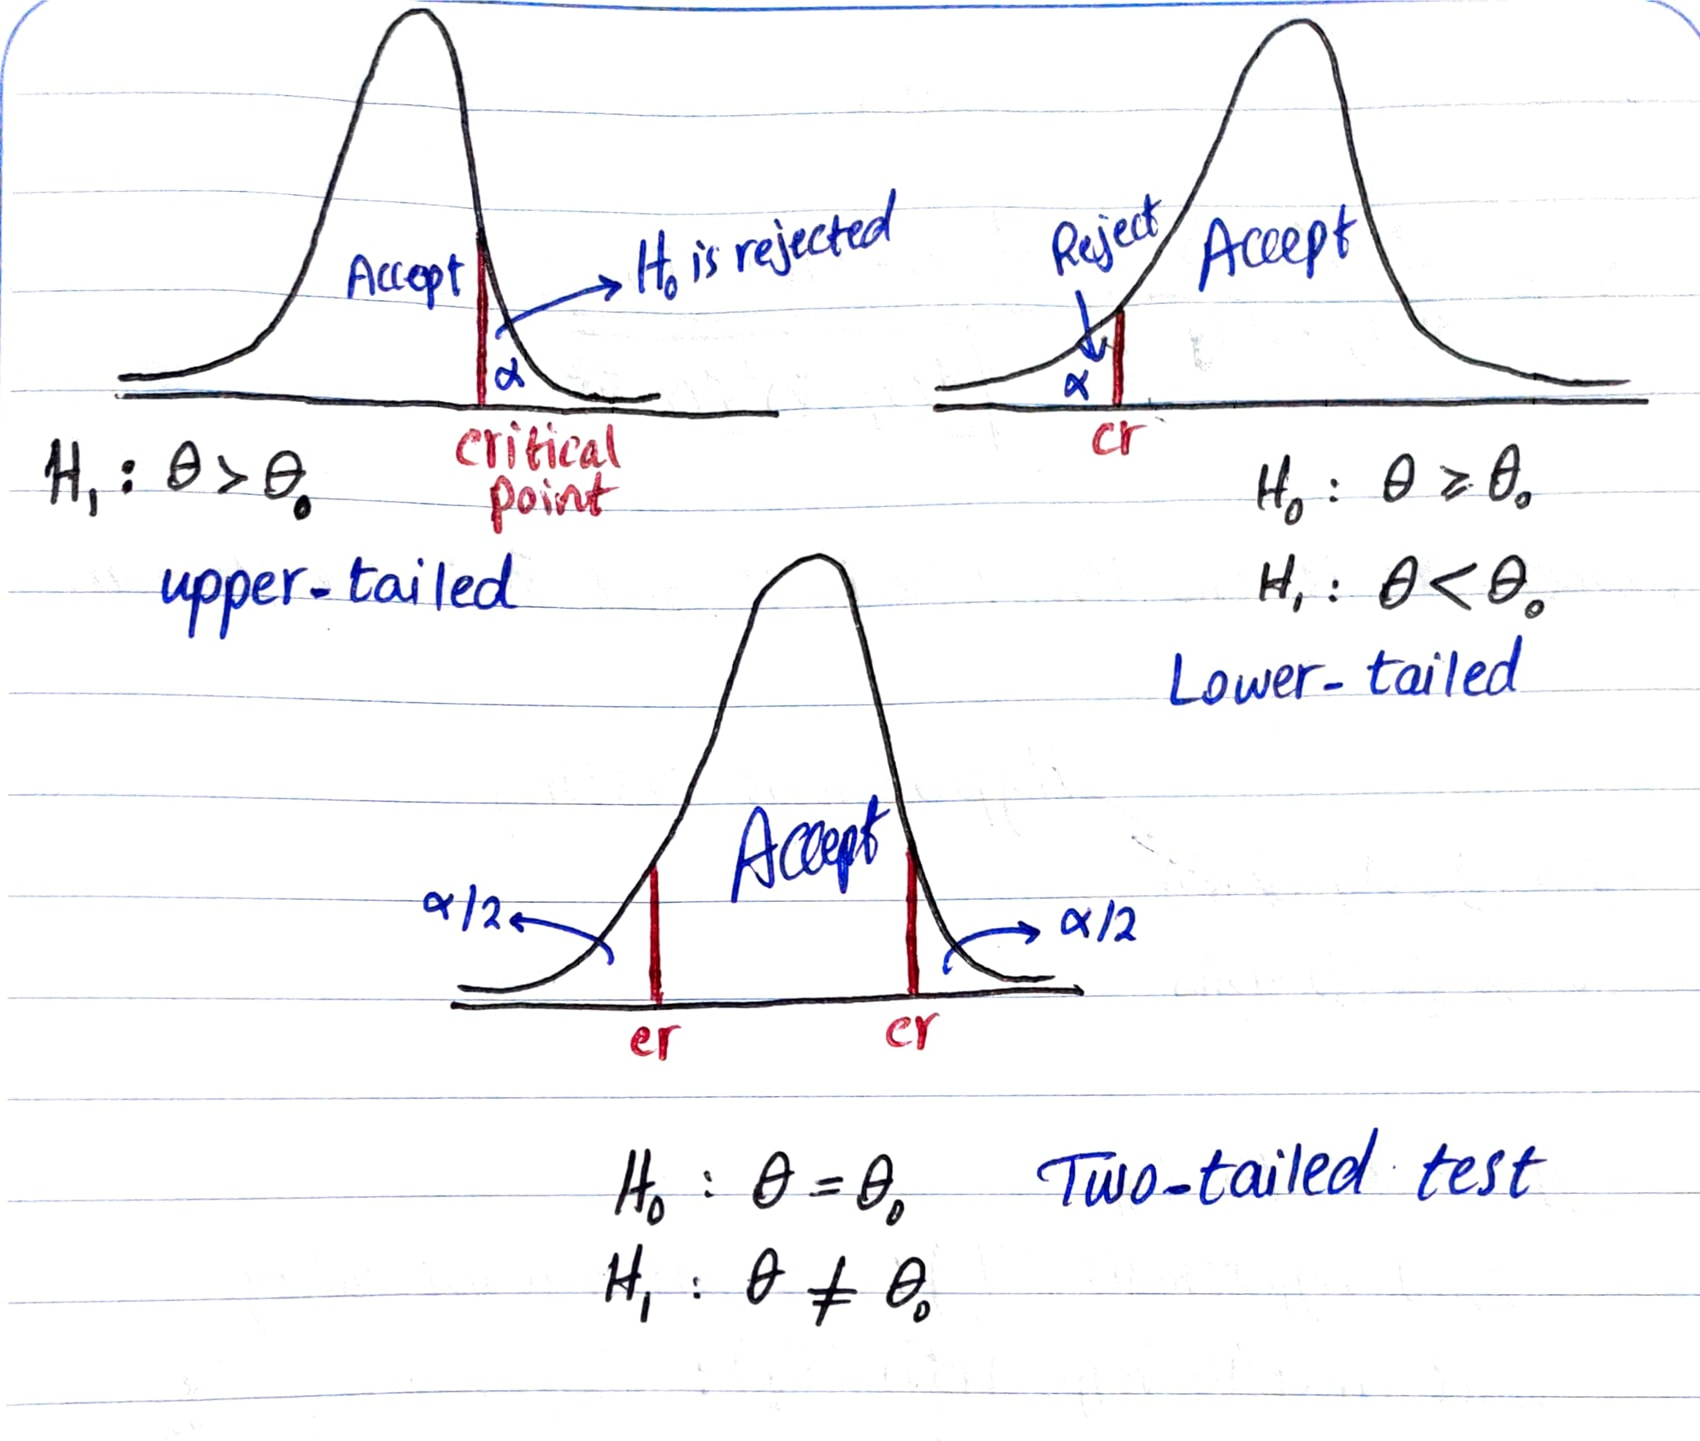

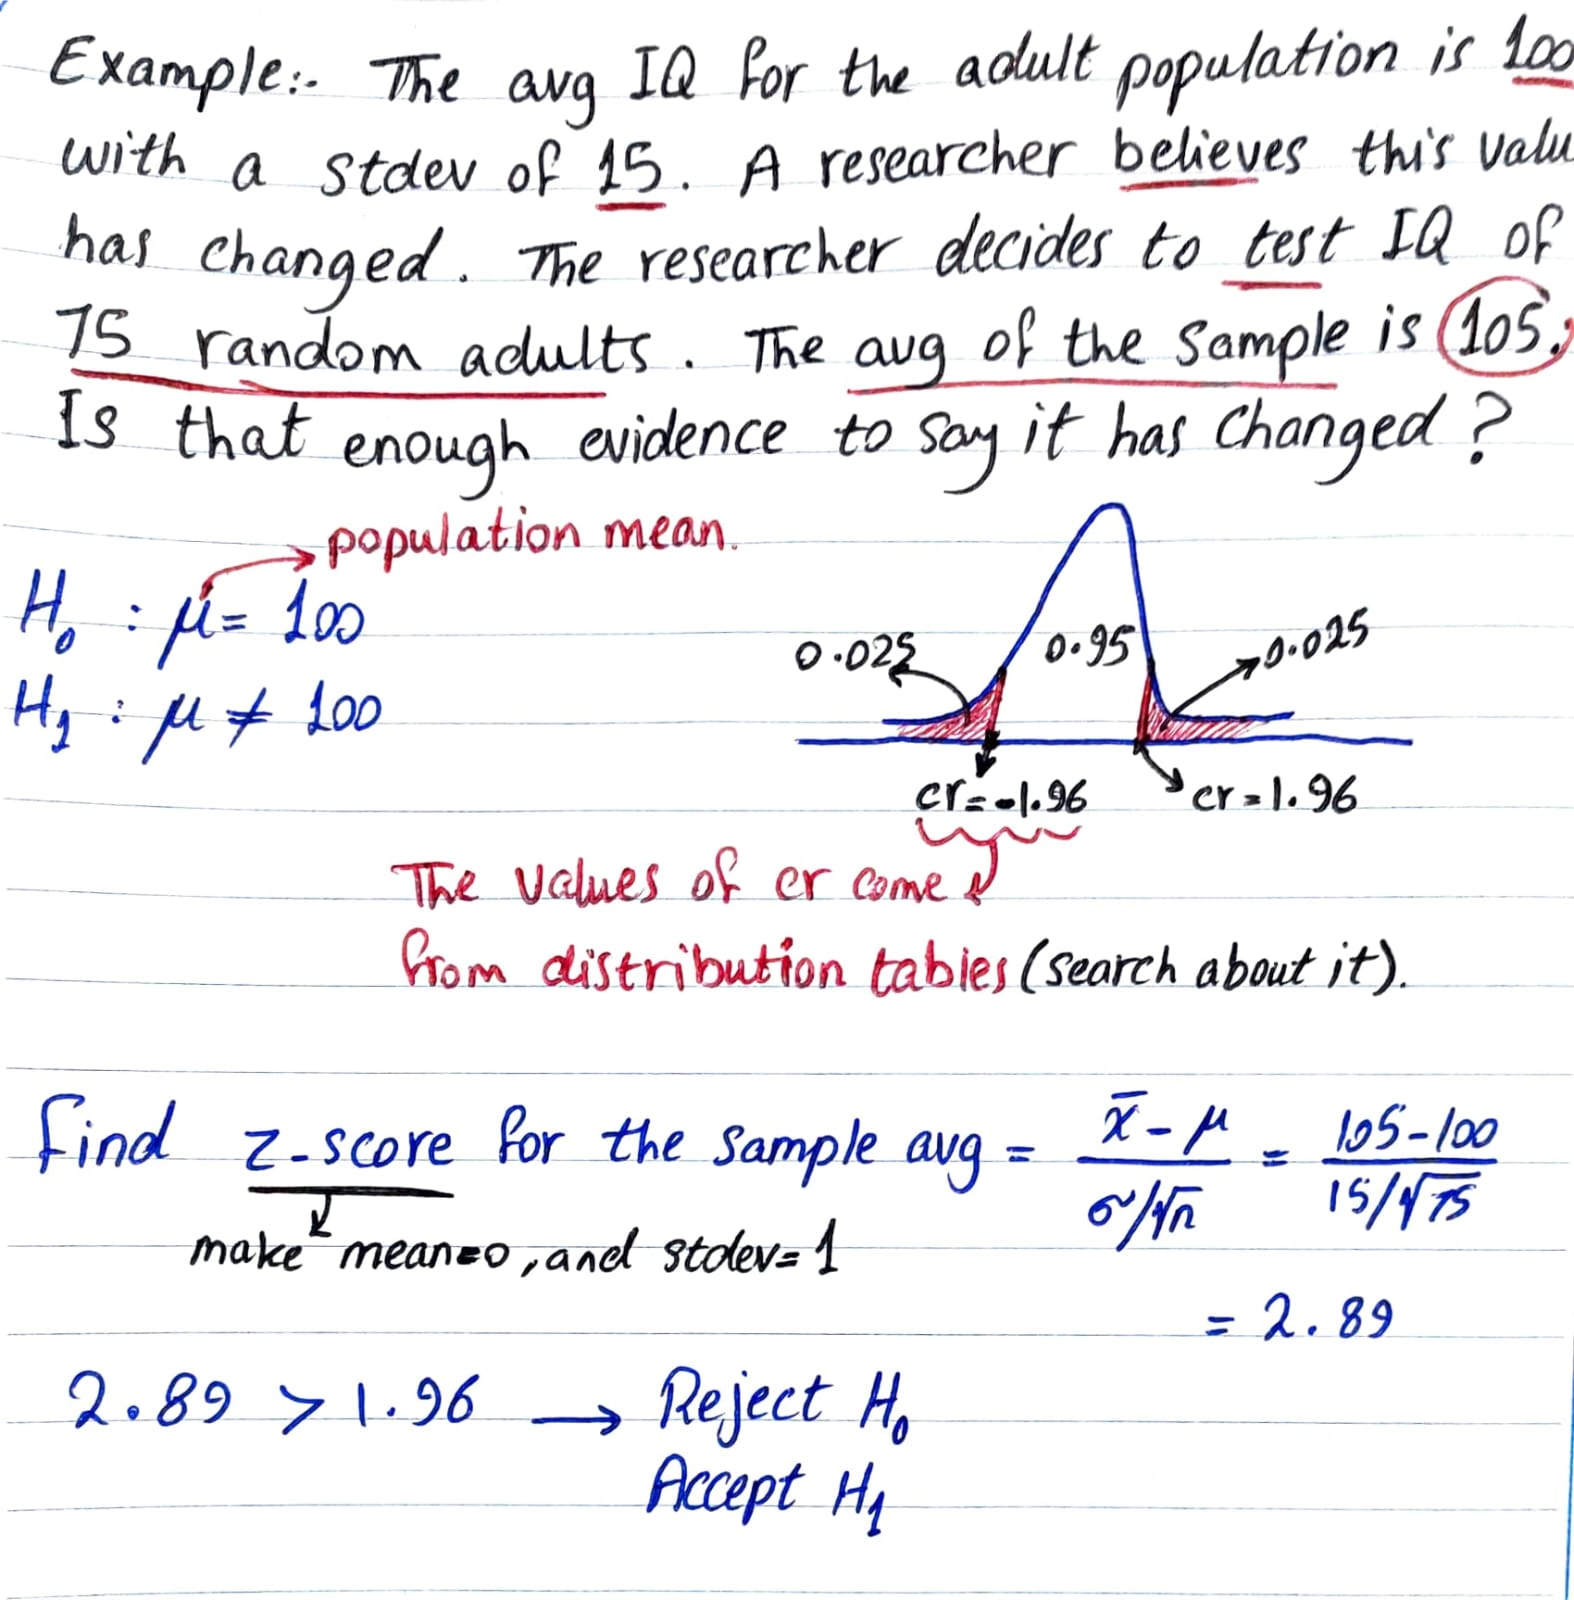

Simply, we can make that with the code

In [26]:
from scipy import stats

r, p = stats.pearsonr(X, y)
print("r : correlation coffecient = ", r)
print("p-value : The probability to observe a value that  = ", p)
print("Significant =",p < 0.05)

r : correlation coffecient =  0.9782416184887598
p-value : The probability to observe a value that  =  1.143068109227237e-20
Significant = True


## Now, let's try these concepts on a bigger dataset

In [27]:
df = pd.read_csv("data/house_prices/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### But we can't make our calculations on non numerical data - so we want to make some preprocessing to be able to work with that data 

First, See if there is any missing data

In [28]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Second, See data describtions

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Second, We note that some columns like (price, sqft_basement, yr_renovated) have zero values and that doesn't make sense so we want to remove these data points

In [30]:
df.shape

(4600, 18)

In [31]:
df = df[df["price"] != 0]
df = df[df["sqft_basement"] != 0]
df = df[df["yr_renovated"] != 0]

In [32]:
df.shape

(811, 18)

Now, we have only 811 rows instead of 4600 but that is better than having a large unsufficient dataset

In [34]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
11,2014-05-02 00:00:00,1400000.0,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
24,2014-05-02 00:00:00,495000.0,4.0,1.75,1600,6380,1.0,0,0,3,1130,470,1959,1989,2021 NE 100th St,Seattle,WA 98125,USA
29,2014-05-02 00:00:00,790000.0,3.0,2.50,2600,4750,1.0,0,0,4,1700,900,1951,1999,3314 NW 75th St,Seattle,WA 98117,USA
31,2014-05-02 00:00:00,499950.0,4.0,2.50,2860,3345,2.0,0,0,3,2190,670,2004,2003,20120 137th Ave NE,Woodinville,WA 98072,USA


Third, Convert categorical data to numerical data - Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["date"] = encoder.fit_transform(df["date"])
df["street"] = encoder.fit_transform(df["street"])
df["city"] = encoder.fit_transform(df["city"])
df["statezip"] = encoder.fit_transform(df["statezip"])
df["country"] = encoder.fit_transform(df["country"])

In [38]:
df.head() # Notice that all categorical data are numerical now

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,777,23,26,0
11,0,1400000.0,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,496,27,43,0
24,0,495000.0,4.0,1.75,1600,6380,1.0,0,0,3,1130,470,1959,1989,273,27,55,0
29,0,790000.0,3.0,2.50,2600,4750,1.0,0,0,4,1700,900,1951,1999,454,27,51,0
31,0,499950.0,4.0,2.50,2860,3345,2.0,0,0,3,2190,670,2004,2003,270,33,36,0


Fourth, Calculate the correlation between inputs and output to choose the better features and eliminate the worst

In [39]:
X = df.drop(["price"], 1)
y = df["price"]

C:\Users\Omar\AppData\Local\Temp\ipykernel_3348\3175335362.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(["price"], 1)


In [43]:
chosen_features = []
for i in X.columns:
    r, p = stats.pearsonr(X[i], y)
    print(f"Feature : {i}, r : {r}, p : {p}, significant : {p<0.05}")
    if p < 0.05 :
        chosen_features.append((r, i))

Feature : date, r : 0.06418606173614912, p : 0.06770586775724531, significant : False
Feature : bedrooms, r : 0.16978675650025343, p : 1.1556690689845644e-06, significant : True
Feature : bathrooms, r : 0.4157075411786476, p : 3.142425221709728e-35, significant : True
Feature : sqft_living, r : 0.5280518352425605, p : 1.9855554432064672e-59, significant : True
Feature : sqft_lot, r : 0.03601961797973758, p : 0.3055900958024432, significant : False
Feature : floors, r : 0.24396812686073654, p : 1.8716671109213567e-12, significant : True
Feature : waterfront, r : 0.28394940714928535, p : 1.6635855170889695e-16, significant : True
Feature : view, r : 0.2883575708730422, p : 5.392926095190785e-17, significant : True
Feature : condition, r : 0.04116470744418529, p : 0.24160709817304632, significant : False
Feature : sqft_above, r : 0.5126225307990947, p : 1.5105383902682729e-55, significant : True
Feature : sqft_basement, r : 0.3474620235470112, p : 1.99796870016711e-24, significant : True


In [45]:
chosen_features.sort(reverse=True)

We can see the chosen features sorted from the highest to lowest. I eliminated the rejected features from hypothesis testing

In [47]:
chosen_features

[(0.5280518352425605, 'sqft_living'),
 (0.5126225307990947, 'sqft_above'),
 (0.4157075411786476, 'bathrooms'),
 (0.3474620235470112, 'sqft_basement'),
 (0.2883575708730422, 'view'),
 (0.28394940714928535, 'waterfront'),
 (0.24396812686073654, 'floors'),
 (0.16978675650025343, 'bedrooms')]

In [52]:
X = X.drop(["statezip", "city", "country", "street", "yr_renovated", "yr_built", "condition", "sqft_lot", "date"], 1)
X.head()

C:\Users\Omar\AppData\Local\Temp\ipykernel_3348\3978116923.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["statezip", "city", "country", "street", "yr_renovated", "yr_built", "condition", "sqft_lot", "date"], 1)


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
4,4.0,2.50,1940,1.0,0,0,1140,800
11,4.0,2.50,2920,1.5,0,0,1910,1010
24,4.0,1.75,1600,1.0,0,0,1130,470
29,3.0,2.50,2600,1.0,0,0,1700,900
31,4.0,2.50,2860,2.0,0,0,2190,670


### That we did above is called : Feature selection - choosing the best features that can be useful to your model

There are tools in sklearn that we can use it to choose the features (Select features)

1) Filter Method : It is a method for feature selection depends on the correlation calculation

In [65]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
k_best = SelectKBest(score_func=f_regression, k=5)

X_train_new = k_best.fit_transform(X_train, y_train)
X_test_new = k_best.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

In [66]:
features = [i for i in X.columns]

for i in selected_feature_indices:
    print("Chosen Feature : ", features[i])

Chosen Feature :  bathrooms
Chosen Feature :  sqft_living
Chosen Feature :  view
Chosen Feature :  sqft_above
Chosen Feature :  sqft_basement


In [67]:
chosen_features

[(0.5280518352425605, 'sqft_living'),
 (0.5126225307990947, 'sqft_above'),
 (0.4157075411786476, 'bathrooms'),
 (0.3474620235470112, 'sqft_basement'),
 (0.2883575708730422, 'view'),
 (0.28394940714928535, 'waterfront'),
 (0.24396812686073654, 'floors'),
 (0.16978675650025343, 'bedrooms')]

Notice that the features we chose after our calculations are the same as filter method chose

2) Wrapper method : generates some features and try to fit it and take the features that makes the highest accuracy

In [80]:
base_model = LinearRegression()

rfe = RFE(estimator=base_model, n_features_to_select=3)

rfe.fit(X_train, y_train)

selected_feature_indices = np.where(rfe.support_)[0]

for i in selected_feature_indices:
    print(features[i])

bathrooms
waterfront
view
